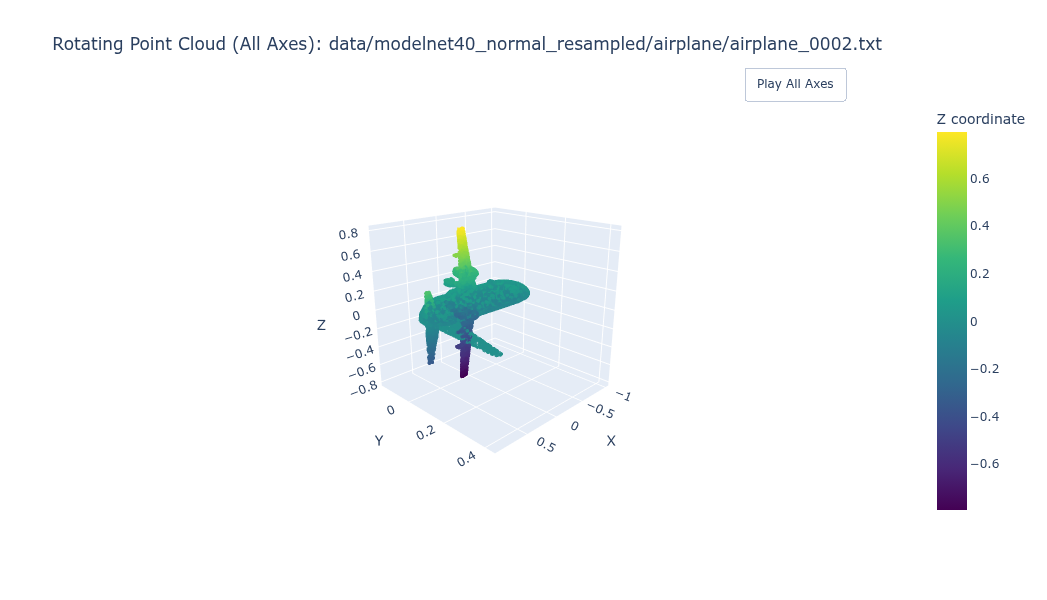

In [11]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

def visualize_rotate_all_axes(data, radius=2.0):
    """Create rotating animation around all three axes"""
    frames = []
    
    # Create a more complex 3D rotation path
    for t in np.arange(0, 6.28, 0.15):  # One full rotation
        # Combine rotations around different axes
        x_eye = radius * np.cos(t) * np.cos(t/2)
        y_eye = radius * np.sin(t) * np.cos(t/2) 
        z_eye = radius * np.sin(t/2)
        
        frames.append(dict(
            layout=dict(
                scene=dict(
                    camera=dict(
                        eye=dict(x=x_eye, y=y_eye, z=z_eye),
                        center=dict(x=0, y=0, z=0),
                        up=dict(x=0, y=0, z=1)
                    )
                )
            )
        ))
    
    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[dict(
                type='buttons',
                showactive=False,
                y=1, x=0.8,
                xanchor='left', yanchor='bottom',
                pad=dict(t=45, r=10),
                buttons=[
                    dict(label='Play All Axes',
                         method='animate',
                         args=[None, dict(frame=dict(duration=100, redraw=True),
                                        transition=dict(duration=0),
                                        fromcurrent=True,
                                        mode='immediate')])
                ]
            )],
            scene=dict(
                camera=dict(
                    eye=dict(x=radius, y=radius, z=radius*0.5),
                    center=dict(x=0, y=0, z=0)
                )
            )
        ),
        frames=frames
    )
    return fig

def visualize_point_cloud(filename):
    """Load and visualize point cloud from txt file with rotating animation"""
    
    # Load data from txt file (x,y,z,nx,ny,nz format)
    data_array = np.loadtxt(filename, delimiter=',')
    x, y, z = data_array[:, 0], data_array[:, 1], data_array[:, 2]
    
    # Center the point cloud at origin
    x = x - np.mean(x)
    y = y - np.mean(y) 
    z = z - np.mean(z)
    
    # Create 3D scatter plot
    scatter_data = go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=2,
            color=z,
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title="Z coordinate")
        ),
        name='Point Cloud'
    )
    
    # Create rotating visualization
    fig = visualize_rotate_all_axes([scatter_data])
    fig.update_layout(
        title=f'Rotating Point Cloud (All Axes): {filename}',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='cube',
            camera=dict(
                center=dict(x=0, y=0, z=0)  # Look at origin
            )
        ),
        width=800,
        height=600
    )
    
    return fig

# Usage example:
filename = 'data/modelnet40_normal_resampled/airplane/airplane_0002.txt'  # Replace with your txt file path
fig = visualize_point_cloud(filename)
fig.show()
fig.write_html(f'{filename}_rotating_visualization.html')